In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt


In [2]:
(x_train,y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()

def preprocess(imgs):
 imgs = imgs.astype("float32") / 255.0
 imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
 imgs = np.expand_dims(imgs, -1)
 return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

4422102/4422102 [==============================] - 0s 0us/step


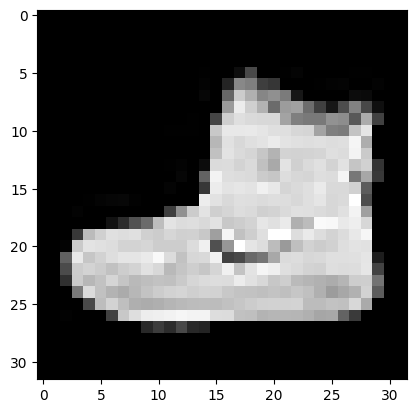

In [3]:
plt.imshow(x_train[0],cmap='gray')

# Autoencoder:<br>
Autoencoder is a neural network made up of two parts:
 * An `encoder` network that compresses high dimensional input data into a lower dimensional embedding vector
 * A `decoder` network that decompresses a given back to the original domain e.g., back to an image.

# Encoder Architecture
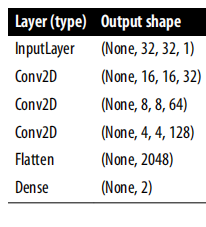

In [4]:
from tensorflow.keras import backend as k
from tensorflow.keras import layers, models


In [55]:

# Coding the encoder architecture
def encoder_func(image_batch):
  encoder_input = layers.Input(shape=image_batch.shape[1:],
                             name='encoder_input')
  # 1st con layer with 32 filters
  x = layers.Conv2D(32,(3,3),strides=2,
                  activation='relu',padding='same', name='conv1_32')(encoder_input)
  # 2nd conv layer with 64 filters
  x = layers.Conv2D(64,kernel_size=(3,3),
                  strides=2,
                  padding='same',
                  activation='relu', name='conv2_62')(x)
  x = layers.Conv2D(128, (3,3), strides=2, activation='relu',
                    padding='same', name='conv3_128')(x)
  # flattening the conv output

  x = layers.Flatten()(x)
  flattened_size=k.int_shape(x)[1:]
  encoder_output = layers.Dense(2, name='laten_state_layer')(x)
  encoder=models.Model(encoder_input, encoder_output)

  return encoder, flattened_size

def decoder_func(flattened_size):
  decoder_input = layers.Input(shape=(2,), name='decoder_input')
  x1 = layers.Dense(np.prod(flattened_size),name='dense1')(decoder_input)
  x2 = layers.Reshape(flattened_size,name='reshape1')(x1)

  return x1, x2



In [56]:
example_image = tf.random.normal((1, 32, 32, 1))
encoder_model,shape_before_flattening = encoder_func(example_image)
decoder_func(shape_before_flattening)

(<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'dense1')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'reshape1')>)

In [49]:
shape_before_flattening

TensorShape([2048])